In [36]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [37]:
import pandas as pd
import numpy as np

In [38]:
# reads in a file separated by multiple spaces.
# So, sep='\s+' is needed. 
df_hip = pd.read_csv( \
'http://bogotobogo.com/python/images/python_Pandas_NumPy_Matplotlib/HIP_star.dat',\
                     sep='\s+')

In [39]:
df_hip.shape

(2720, 9)

In [40]:
# check if a column has no data (or NaN)
df_hip.isnull().sum()

HIP       0
Vmag      1
RA        1
DE        1
Plx       1
pmRA      1
pmDE      1
e_Plx     1
B-V      42
dtype: int64

In [41]:
# drop any row if any of the column is missing data
df_hip = df_hip.dropna()

In [42]:
# check if a column has no data (or NaN) again
df_hip.isnull().sum()

HIP      0
Vmag     0
RA       0
DE       0
Plx      0
pmRA     0
pmDE     0
e_Plx    0
B-V      0
dtype: int64

In [43]:
df_hip.shape

(2678, 9)

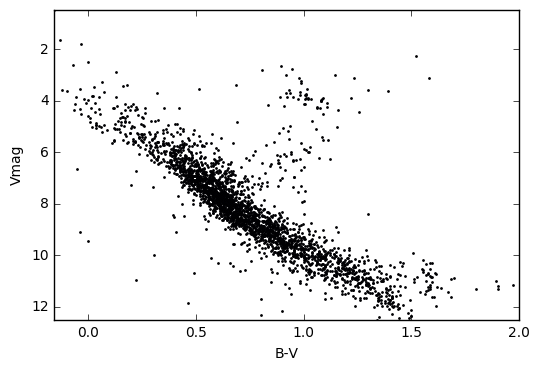

In [44]:
x = df_hip.iloc[:,8].values 
y = df_hip.iloc[:,1].values
fig = figure()
ax = fig.add_subplot(111)
ax.set_xlabel('B-V')
ax.set_ylabel('Vmag')
scatter(x,y,s=1) # marker size
ylim([y.min(axis=0),y.max(axis=0)]) # x-axis range
xlim([x.min(axis=0),2]) # x-axis range
gca().invert_yaxis()  # y-axis reversed
show()

In [ ]:
# The lines below are just for exercise 
# to check data and manipulating numpy arrays

In [9]:
df_hip[:5]

,HIP,Vmag,RA,DE,Plx,pmRA,pmDE,e_Plx,B-V
0,2,9.27,0.003797,-19.498837,21.90,181.21,-0.93,3.10,0.999
1,38,8.65,0.111047,-79.061831,23.84,162.30,-62.40,0.78,0.778
2,47,10.78,0.135192,-56.835248,24.45,-44.21,-145.90,1.97,1.150
3,54,10.57,0.151656,17.968956,20.97,367.14,-19.49,1.71,1.030
4,74,9.93,0.221873,35.752722,24.22,157.73,-40.31,1.36,1.068
